# Plotting Data from the Oahu Simulating Waves Nearshore (SWAN) Regional Wave Model

_Note: this notebook requires python3._

This notebook demonstrates a possible use case for the [PacIOOS SWAN regional wave model for Oahu, Hawaii](http://data.planetos.com/datasets/pacioos_swan_oahu:simulating-waves-nearshore-swan-regional-wave-model-oahu?utm_source=github&utm_medium=notebook&utm_campaign=swan-oahu-api-notebook).

API documentation is available at http://docs.planetos.com. If you have questions or comments, join the [Planet OS Slack community](http://slack.planetos.com) to chat with our development team.

For general information on usage of IPython/Jupyter and Matplotlib, please refer to their corresponding documentation. https://ipython.org/ and http://matplotlib.org/

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
from urllib.request import urlopen, Request
import simplejson as json

Let's select a location of interest. Note that this model provides only regional spatial coverage in the immediate vicinity of Oahu's coastline. Point requests the lie outside the model's spatial extent will not return data.

In [2]:
location = 'Hawaii Oahu'
if location == 'Est':
    longitude = 24.+45./60
    latitude = 59+25/60.
elif location == 'Au':
    longitude = 149. + 7./60
    latitude = -35.-18./60
elif location == "Hawaii Oahu":
    latitude = 21.205
    longitude = -158.35

**Important!** Please put your datahub API key into a file called APIKEY and place it to the notebook folder or assign your API key directly to the variable API_key! You'll find your API key on the [Planet OS account settings page](http://data.planetos.com/account/settings/?utm_source=github&utm_medium=notebook&utm_campaign=swan-oahu-api-notebook).

In [3]:
apikey = open('APIKEY').read().strip()
API_url = "http://api.planetos.com/v1/datasets/pacioos_swan_oahu/point?lon={0}&lat={1}&count=1000&verbose=false&apikey={2}".format(longitude,latitude,apikey)
print(API_url)
request = Request(API_url)
response = urlopen(request)
API_data = json.loads(response.read())

http://api.planetos.com/v1/datasets/pacioos_swan_oahu/point?lon=-158.35&lat=21.205&count=1000&verbose=false&apikey=535871ea3d554497843ab250a497e626


In [4]:
print("{0:<50} {1}".format("Variable","Context"))
print()
for k,v in set([(j,i['context']) for i in API_data['entries'] for j in i['data'].keys()]):
    print("{0:<50} {1}".format(k,v))

Variable                                           Context

pper                                               reference_time_time_z_lat_lon
mdir                                               reference_time_time_z_lat_lon
time_offset                                        reference_time_time
mper                                               reference_time_time_z_lat_lon
shgt                                               reference_time_time_z_lat_lon
pdir                                               reference_time_time_z_lat_lon


In [5]:
reftimes = set()
for i in API_data['entries']:
    reftimes.update([i['axes']['reftime']])
reftimes=list(reftimes)
if len(reftimes)>1:
    reftime = reftimes[0] if dateutil.parser.parse(reftimes[0])<dateutil.parser.parse(reftimes[1]) else reftimes[1]
else:
    reftime = reftimes[0]

In [6]:
reftime

'2016-04-23T00:00:00'

In [7]:
varlist = ['mdir','mper','pdir','shgt','pper']

In [8]:
vardict = {}
for i in varlist:
    vardict['time_'+i]=[]
    vardict['data_'+i]=[]
for i in API_data['entries']:
    #print(i['context'])
    if i['context'] == 'reference_time_time_z_lat_lon' and i['axes']['reftime']==reftime:
        for j in i['data']:
            vardict['data_'+j].append(i['data'][j])
            vardict['time_'+j].append(dateutil.parser.parse(i['axes']['time']))

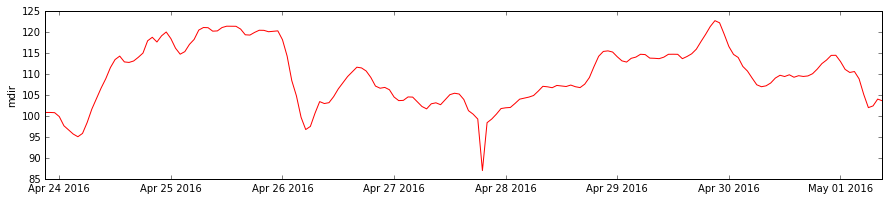

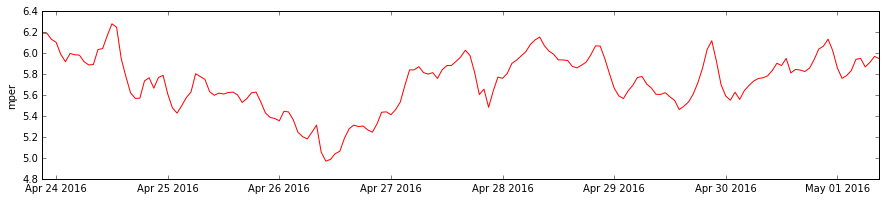

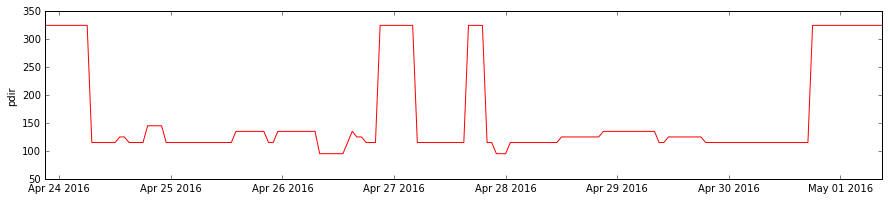

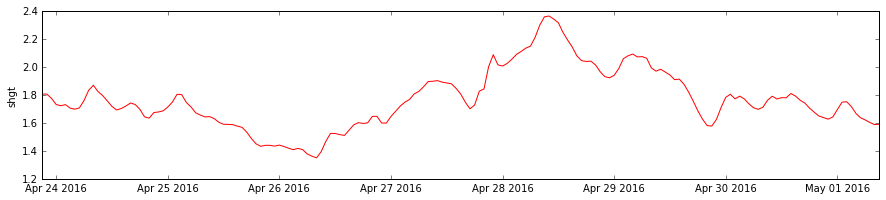

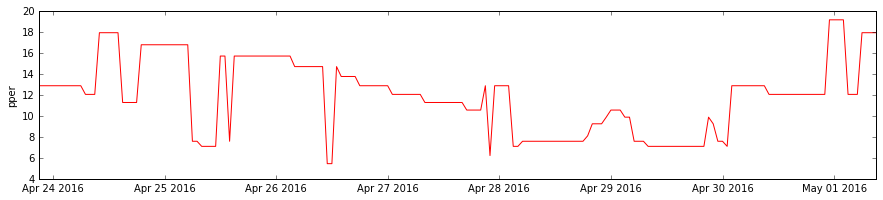

In [9]:
for i in varlist:
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    plt.plot(vardict['time_'+i],vardict['data_'+i],color='r')
    ax.set_ylabel(i)